epoch : 1 , batch: 0 loss: 0.7093110680580139 
epoch : 1 , batch: 1 loss: 0.7058876156806946 
epoch : 1 , batch: 2 loss: 0.7110633850097656 
epoch : 1 , batch: 3 loss: 0.7029604911804199 
epoch : 1 , batch: 4 loss: 0.6962843537330627 
epoch : 1 , batch: 5 loss: 0.7008009552955627 
epoch : 1 , batch: 6 loss: 0.694658637046814 
epoch : 1 , batch: 7 loss: 0.7011111378669739 
epoch : 1 , batch: 8 loss: 0.6982342600822449 
epoch : 2 , batch: 0 loss: 0.6908770203590393 
epoch : 2 , batch: 1 loss: 0.6978381872177124 
epoch : 2 , batch: 2 loss: 0.7042335271835327 
epoch : 2 , batch: 3 loss: 0.6990953087806702 
epoch : 2 , batch: 4 loss: 0.7004163861274719 
epoch : 2 , batch: 5 loss: 0.7014570832252502 
epoch : 2 , batch: 6 loss: 0.6964471340179443 
epoch : 2 , batch: 7 loss: 0.6938332915306091 
epoch : 2 , batch: 8 loss: 0.6941671967506409 
epoch : 3 , batch: 0 loss: 0.705101728439331 
epoch : 3 , batch: 1 loss: 0.6947309970855713 
epoch : 3 , batch: 2 loss: 0.6999576091766357 
epoch : 3 , bat

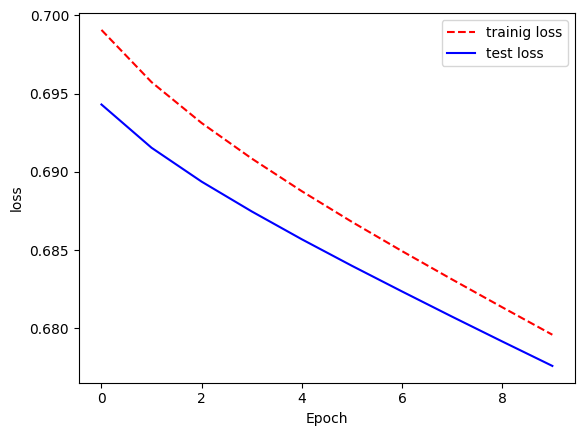

In [2]:

import torch 
import torch.nn as nn 
from torch.utils.data import DataLoader, TensorDataset
from torch.optim import RMSprop 
from sklearn.datasets import make_classification 
from sklearn.model_selection import train_test_split 
import numpy as np 
import matplotlib.pyplot as plt 
features,target = make_classification(n_classes=2,n_features=10,n_samples=1000)

features_train,features_test,target_train,target_test = train_test_split(features,target,test_size=0.1,random_state=1)

x_train = torch.from_numpy(features_train).float()
x_test = torch.from_numpy(features_test).float()

y_train = torch.from_numpy(target_train).float().view(-1,1)
y_test = torch.from_numpy(target_test).float().view(-1,1)

torch.manual_seed(0)
np.random.seed(0)

class Mysimplenet(nn.Module):
  def __init__(self):
    super(Mysimplenet,self).__init__()
    self.sequential = nn.Sequential(
      nn.Linear(10,16),
      nn.ReLU(),
      nn.Linear(16,16),
      nn.ReLU(),
      nn.Linear(16,1),
      nn.Sigmoid(),
    )

  def forward(self,x):
    x= self.sequential(x)
    return x 
  
network = Mysimplenet()
criterion = nn.BCELoss()
optimizer = RMSprop(params=network.parameters(),lr=1e-4,weight_decay=1e-5)
epochs = 10 
dataset = TensorDataset(x_train,y_train)
loader = DataLoader(dataset,batch_size=100,shuffle=True)
train_losses = []
test_losses = []
for i in range(epochs):
  for batch_idx,(data,target) in enumerate(loader):
    optimizer.zero_grad()
    output = network(data)
    loss = criterion(output,target)
    loss.backward()
    optimizer.step()

    torch.save({
      'epoch':i,
      'model_state_dict':network.state_dict(),
      'optimizer_state_dict':optimizer.state_dict(),
      'loss':loss,
    },"model.pt")

    print(f"epoch : {i+1} , batch: {batch_idx} loss: {loss.item()} ")


  with torch.no_grad():
    train_output = network(x_train)
    train_losses.append(criterion(train_output, y_train).item())
    test_output = network(x_test)
    test_losses.append(criterion(test_output,y_test).item())

epochs = range(0,epochs)
plt.plot(epochs,train_losses,"r--")
plt.plot(epochs,test_losses,"b-")
plt.legend(["trainig loss", "test loss"])
plt.xlabel("Epoch")
plt.ylabel("loss")
plt.show()



